# Implementación del algoritmo de *Gradiente Descendente* en *Regresión Lineal*

En este archivo se tiene como objetivo rescatar el código mostrado e implementado en clase correspondiente a *Regresión Lineal* donde ahora el objetivo es usar el algoritmo de *Gradiente Descendente* para calcular el `w` mínimo que me optimice la función de coste.

## Importación de librerías

Se importan las librerías `pandas`, `numpy` y `matplotlib.pyplot` las cuales nos ayudarán en manejar los datos, realizar operaciones con los datos y graficar los datos que deseemos, respectivamente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Implementación del *Gradiente Descendente*

En el código usado en clase se utilizan métodos nativos de la *Regresión Lineal* para calcular el `w` que optimice la función de coste, en este caso usando una función la cual se llamó `GradienteDescendente()` que calcula precisamente la pendiente de la función de coste (calcula `w`) usando el algoritmo de *Gradiente Descendente*, para ello requiere tomar los valores de `x`, `y`, `n`, `w_0`, `alpha`, `num_iter` donde la descripción de cada uno se puede ver en el código a continuación.

In [2]:
def GradienteDescendente(x, y, n, w_0, A, iter):
    # x: vector de diseño (ingresos)
    # y: vector de objetivos (target) (consumo)
    # n: nº de puntos a considerar en el cálculo de la pendiente
    # w_0: pendiente inicial
    # A: tasa de aprendizaje
    # iter: número de iteraciones del gradiente descendente

    X = x[:n]
    Y = y[:n]
    w = w_0  # Inicializamos la pendiente con el valor inicial w_0

    # Listas para almacenar los valores de w y de la función de costo en cada iteración
    w_val = []
    cost_val = []

    for i in range(iter):

        J = np.sum(error**2) / n # Definimos funcion de costo

        h = w * X  # Calculamos la predicción del modelo lineal
        error = h - Y  # Error de la forma: (h - y)
        
        dj = 2 * np.sum(error * X) / n # Derivada de la función de costo con respecto a w

        w = w - A * dj # w(t+1) será la actualización del valor de w original con la formula vista en clase

        w_val.append(w) #Guardando valores de w y funcion de costo
        cost_val.append(J)

    return w, np.array(w_val), np.array(cost_val)  # Retorna valores para graficar

Debido a que literalmente se utiliza la misma serie de funciones que se utilizó en el código en clase teniendo una particularidad y es que se cambia la función `CalculaPendiente()` por la nueva función `CalculaPendiente_GradienteDescendente()`, que calcula la pendiente por el algoritmo mencionado al inicio.

In [3]:
def CargaDatos():
    # x: vector de diseño (ingresos)
    # y: vector de objetivos (target) (consumo)

    df = pd.read_excel('DatosRegresion1D.xlsx')
    x = df['ingresos']
    y = df['consumo']
    return x,y

def DibujaDatos(x,y,n):
    # x: vector de diseño (ingresos)
    # y: vector de objetivos (target) (consumo)
    # n: nº de puntos a dibujar

    plt.figure()
    plt.plot(x[:n],y[:n],'x')
    plt.xlabel('Ingresos anuales (miles de €)')
    plt.ylabel('Consumo anual de electricidad (Mw-h)')


def DibujaRecta(w,b):
    # w: pendiente de la recta de regresión
    # b: intersección de la recta de regresión

    xmin,xmax = plt.xlim()
    ymin = w*xmin + b
    ymax = w*xmax + b
    plt.plot([xmin,xmax],[ymin,ymax])


def DibujaFuncionCoste(x,y,n,w_0,alpha,num_iter):
    # x: vector de diseño (ingresos)
    # y: vector de objetivos (target) (consumo)
    # n: nº de puntos a dibujar

    xtrain = x[:n]
    ytrain = y[:n]
    nw = 100 # Número de valores del parámetro w a considerar
    w_vector = np.linspace(0,0.3,nw) # Valores del parámetro w (pendiente)
    b = 0 # Valor de la intersección de la recta de regresión
    J = np.zeros(nw) # Reserva de espacio para el vector de costes
    for k in range(nw):
        w = w_vector[k]
        htrain = w*xtrain + b # hipótesis
        etrain = htrain-ytrain # error (h-y)
        J[k] = np.sum(etrain**2) / n # Coste para un determinado valor de w

    wmin, w_values, cost_values = GradienteDescendente(x, y, n, w_0, alpha, num_iter)
    print(wmin)

    plt.figure()
    plt.plot(w_vector,J)
    plt.plot(w_values, cost_values,'-',marker='o', markersize=4)
    plt.xlabel('Parámetro: w')
    plt.ylabel('Función de coste: J(w)')

# SECCIÓN REEMPLAZADA POR LA NUEVA FUNCIÓN

# def CalculaPendiente(x,y,n):
#     # x: vector de diseño (ingresos)
#     # y: vector de objetivos (target) (consumo)
#     # n: nº de puntos a considerar en el cálculo de la pendiente
#     # w: pendiente de la recta de regresión

#     xtrain = x[:n]
#     ytrain = y[:n]
#     w = np.sum(xtrain*ytrain) / np.sum(xtrain**2)
#     return w

# SECCIÓN REEMPLAZADA POR LA NUEVA FUNCIÓN

def DibujaCurvaAprendizaje(x,y,w_0,alpha,num_iter):
    # x: vector de diseño (ingresos)
    # y: vector de objetivos (target) (consumo)

    npuntos = 50 # Nº de puntos de la curva de aprendizaje
    ntrain_vector = np.linspace(10,200,npuntos) # Nº clientes training (vector)
    Jtrain = np.zeros(npuntos) # Reserva de espacio para el coste de training
    Jtest = np.zeros(npuntos) # Reserva de espacio para el coste de testing

    for k in range(npuntos): # Itera para distintos valores de ntrain
        #Cálculo del coste para el Training Dataset
        ntrain = ntrain_vector[k]
        ntrain = ntrain.astype('int') # Lo convierte en un número entero
        xtrain = x[:ntrain] # Vector de diseño (training)
        ytrain = y[:ntrain] # Vector de objetivos (training)
        w, w_values, cost_values = GradienteDescendente(xtrain,ytrain,ntrain,w_0,alpha,num_iter) # Pendiente óptima
        b = 0 # Valor de la intersección de la recta de regresión
        htrain = w*xtrain + b # Hipótesis (training)
        etrain = htrain-ytrain # Error (h-y) (training)
        Jtrain[k] = np.sum(etrain**2) / ntrain # Coste (training)

        # Cálculo del coste para el Test Dataset
        xtest = x[ntrain:] # Vector de diseño (test)
        ytest = y[ntrain:] # Vector de objetivos (test)
        ntest = len(ytest) # Número de elementos en el vector de test
        htest = w*xtest + b # Hipótesis (test)
        etest = htest-ytest # Error (h-y) (test)
        Jtest[k] = np.sum(etest**2) / ntest # Coste (test)

    # Dibujo de la curva de aprendizaje
    plt.figure()
    plt.plot(ntrain_vector,Jtrain, label='Entrenamiento')
    plt.plot(ntrain_vector,Jtest, label='Prueba')
    plt.xlabel('Número de clientes para entrenamiento')
    plt.ylabel('Función de coste: J(w)')
    plt.legend()

Así, se comienza a desarrollar el taller solicitado.

## Desarrollo del taller

1. Leer el fichero de datos "DatosRegresion1D.xlsx". Considere:
    - Para entrenamiento se utilizarán los 100 primeros clientes del fichero.
    - La hipótesis (el modelo) es que los puntos se ajustan a una recta que pasa por el origen.
    - La función de coste es cuadrática.

Para la lectura del fichero mencionado, se usa la función ya previamente establecida `CargaDatos()`.

In [4]:
x,y = CargaDatos()

Para la hipótesis, como solo menciona que los datos deben pasar por el origen, la función `DibujaRecta()` contempla en principio esa posibilidad tras tomar su segundo argumento igual a 0, así solamente faltaría calcular el valor de `w` con el algoritmo de *Gradiente Descendente*.

Para hacer la toma de los primeros 100 clientes, es pertinente usar la función `DibujaDatos()` para visualizar esos primeros 100 clientes que se solicitan.

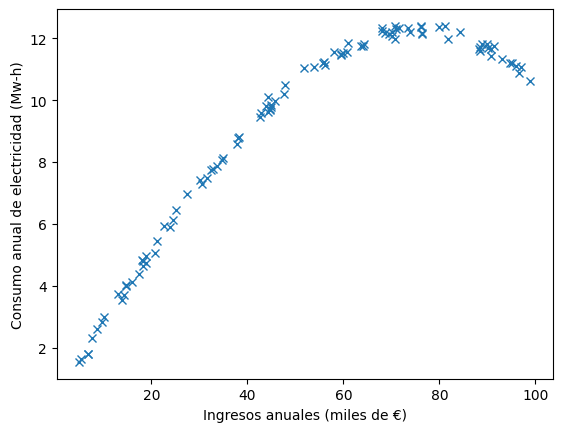

In [5]:
DibujaDatos(x,y,100)

2. Optimice el modelo anterior utilizando el algoritmo de *Gradiente Descendente*.
    - Dibuje la función de $J(w)$.
    - En el gráfico anterior, dibuje la trayectoria seguida por la función de coste en cada iteración. Utilice los siguientes parámetros del optimizador:
        - Valor inicial (para la primera iteración) $w_0$ = 0.3.
        - Tasa de aprendizaje (learning rate) $\alpha$ = $10^{-5}$.
    - Dibuje la evolución de $J(w)$ para cada iteración.
    - Repita el entrenamiento para el caso en el que $\alpha$ = $2.5 \times 10^{-4}$.

Para dibujar la función coste usamos la función `DibujaFuncionCoste()` la cual fue modificada del original incluyendo la función `GradienteDescendente()` la cual calcula la función de coste para cada iteración de `w` junto a los diferentes valores de `w` en cada iteración también, y finalmente el valor de `w` mínimo que optimiza la función.

Para este caso se usa $w_0$ = 0.3 y $\alpha$ = $10^{-5}$.

0.16110059707696817


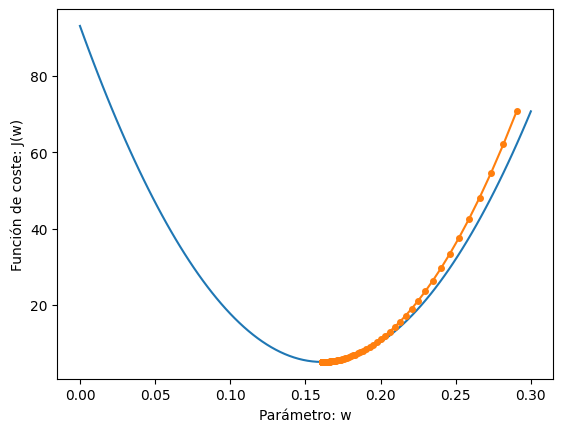

In [6]:
DibujaFuncionCoste(x,y,100,0.3,1e-5,100)

De color naranja se puede ver la función de coste para cada iteración y de color azul la función de coste calculada. A su vez se imprime el valor obtenido para `w` mínimo con el algoritmo de *Gradiente Descendente*.

Junto a ello se imprime la función con la recta que yace de obtener el `w` mínimo junto a la gráfica de los datos, esto con las funciones `DibujaDatos()` y `DibujaRecta()`. Luego se utiliza la función `DibujaCurvaAprendizaje()` la cual nos muestra el aprendizaje de la máquina con dicho `w` que optimiza la función de coste. Nuevamente se imprime el valor obtenido para `w` mínimo con el algoritmo de *Gradiente Descendente*.

0.16110059707696817


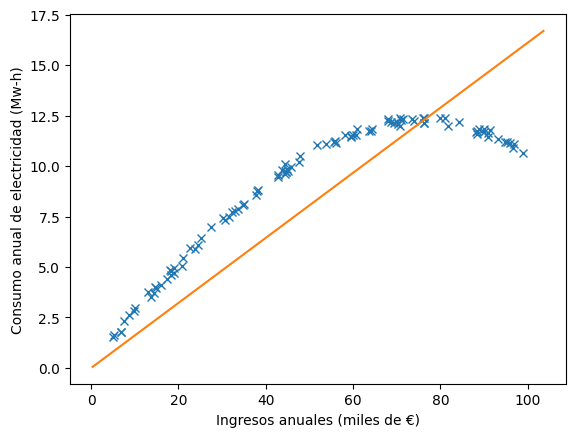

In [7]:
w, w_values, cost_values = GradienteDescendente(x,y,100,0.3,1e-5,100)
print(w)
DibujaDatos(x,y,100)
DibujaRecta(w,0)

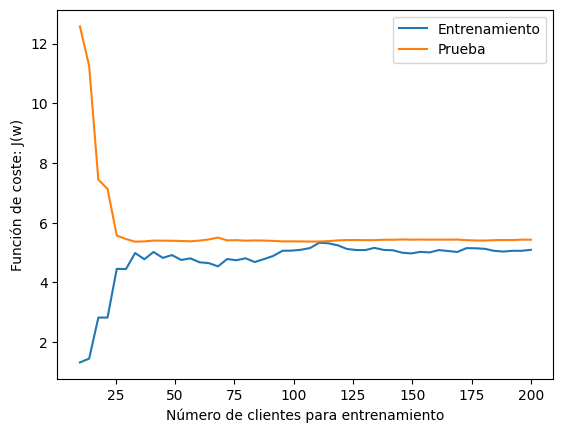

In [8]:
DibujaCurvaAprendizaje(x,y,0.3,1e-5,100)
plt.show()

Finalmente, realizando un proceso 100% análogo pero ahora con $\alpha$ = $2.5 \times 10^{-4}$, resultan las gráficas de la forma:

- Para dibujar la función de coste:

0.1609789136201636


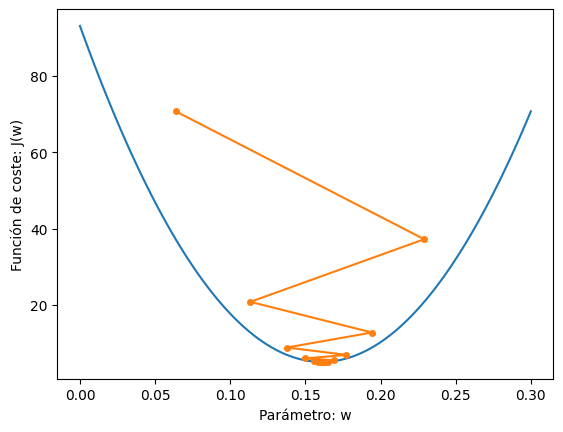

In [9]:
DibujaFuncionCoste(x,y,100,0.3,2.5e-4,100)

- Para dibujar los datos con la recta que lo aproxima:

0.1609789136201636


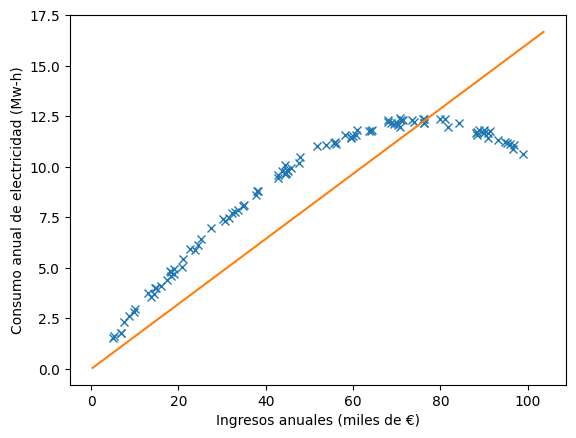

In [10]:
w, w_values, cost_values = GradienteDescendente(x,y,100,0.3,2.5e-4,100)
print(w)
DibujaDatos(x,y,100)
DibujaRecta(w,0)

- Para dibujar la curva de aprendizaje:

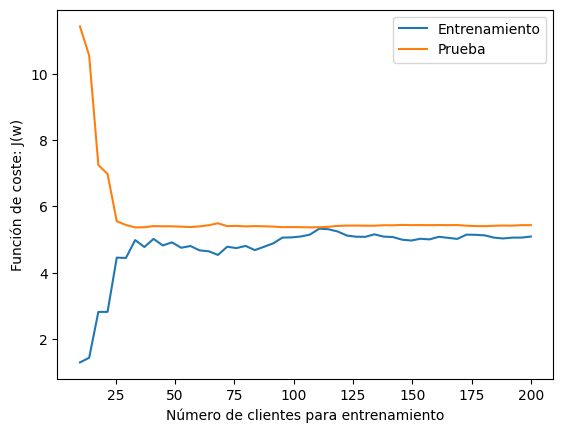

In [11]:
DibujaCurvaAprendizaje(x,y,0.3,2.5e-4,100)
plt.show()

Dando así, solución al ejercicio planteado del cual se puede concluir que la taza de aprendizaje $\alpha$ si influye en la forma en que el algoritmo obtiene ese valor mínimo, situación que se puede evidenciar al comparar ambas gráficas de las funciones de coste, sin embargo, al final se obtienen los mismos resultados en las demás gráficas por lo que hablamos que el tener un $\alpha$ adecuado nos da una eficiencia informática mucho más amplia, al converger el punto mucho más rápido.